# Getting Started

### Import modules

In [1]:
from rlway.pyosrd.osrd import OSRD
from rlway.schedules import Schedule, schedule_from_osrd

# Import two CpAgents :
from rlway_cpagent.ortools_agent.ortools_agent import OrtoolsAgent

### Load a use case and add delays

In [2]:
# Load an OSRD use case
ref = OSRD(use_case='station_capacity2', dir='tmp')
# Clear the tmp delays
ref.reset_delays()
# Add a new delay to the use case
ref.add_delay('train0', time_threshold=100, delay=285.)
delayed = ref.delayed()

[10:45:31,034] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[10:45:31,064] [INFO]              [FullInfra] parsing infra
[10:45:31,150] [INFO]              [FullInfra] adaptation to kotlin
[10:45:31,191] [INFO]              [FullInfra] loading signals
[10:45:31,200] [INFO]              [FullInfra] building blocks
[10:45:31,207] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/simulation.json
[10:45:31,221] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.0
[10:45:31,274] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.1
[10:45:31,281] [INFO]  [StandaloneSimulationCommand] All simulations completed
[10:45:31,281] [INFO]  [StandaloneSimulationCommand] Saving results at: tmp/results.json


### Visualize use case

In [3]:
# Convert the simulation in a format more suitable for visualization
delayed_schedule = schedule_from_osrd(delayed)

In [4]:
# Draw the infrastructure
delayed_schedule.draw_graph()

/home/simon/dev/python/cpagent/.venv/lib/python3.10/site-packages/rlway/schedules/schedules.py:425: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  for u, v in zip(self.df.index, self.df.fillna(0).values)


<Axes: xlabel='Time'>

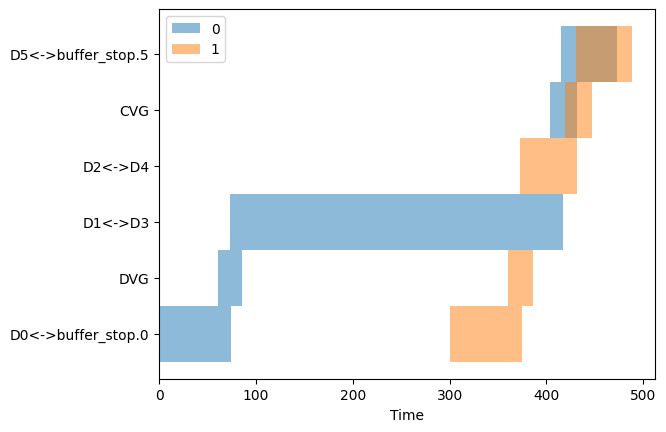

In [5]:
# Plot the space/time graph
delayed_schedule.plot()

### Compute an optimal regulation using OrtoolsAgent

In [6]:
ortools_regulated = ref.regulate(agent=OrtoolsAgent("ortools_agent"))
ortools_regulated_schedule = schedule_from_osrd(ortools_regulated)

[10:45:31,918] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[10:45:31,950] [INFO]              [FullInfra] parsing infra
[10:45:32,012] [INFO]              [FullInfra] adaptation to kotlin
[10:45:32,041] [INFO]              [FullInfra] loading signals
[10:45:32,046] [INFO]              [FullInfra] building blocks
[10:45:32,051] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/delayed/ortools_agent/simulation.json
[10:45:32,062] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.0
[10:45:32,114] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.1
[10:45:32,124] [INFO]  [StandaloneSimulationCommand] All simulations completed
[10:45:32,124] [INFO]  [StandaloneSimulationCommand] Saving results at: tmp/delayed/ortools_agent/results.json


<Axes: xlabel='Time'>

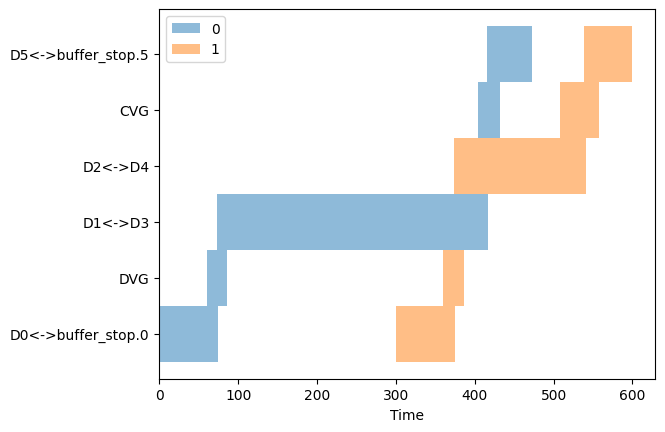

In [7]:
# Plot the space/time graph
ortools_regulated_schedule.plot()

### 